# Introduction to gauss quadrature rule for integration

- [x] 1d gauss quadrature rule
- [x] 2d gauss quadrature rule
- [x] integration in 1d/2d

Author  : Yang Bai @ M3 Group

Date    : 2021.12.22

QQ group: 628204857

Question: how can we calculate the integration looks like: $\int_{-1}^{1}cos(x)dx$ ?

We know the analytical solution is: $\mathrm{sol}=sin(x)|_{-1}^{1}$, how can we get the answer numerically?

1-th gauss point: xi=  -9.06180e-01, weight=   2.36927e-01
2-th gauss point: xi=  -5.38469e-01, weight=   4.78629e-01
3-th gauss point: xi=   0.00000e+00, weight=   5.68889e-01
4-th gauss point: xi=   5.38469e-01, weight=   4.78629e-01
5-th gauss point: xi=   9.06180e-01, weight=   2.36927e-01


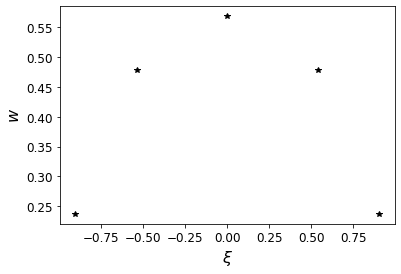

In [7]:
import numpy as np
from FEToy.fe.gaussrule import gausspoint1d
my1dgp=gausspoint1d(ngp=5) # up to 5
my1dgp.creategausspoint() # generate gauss points
my1dgp.print() # print out basic message
my1dgp.plot()

In [13]:
analyticalsol=np.sin(1)-np.sin(-1) # this is our analytical solution

ngp=5
my1dgp.setnum(ngp) # set up the number of gauss points
my1dgp.update()    # you must call update after the set function
sum=0.0
for i in range(ngp):
    x,w=my1dgp.gpcoords[i,1],my1dgp.gpcoords[i,0] # 0->weight, 1-> coordinate
    sum+=np.cos(x)*w

error=100.0*np.abs(sum-analyticalsol)/analyticalsol # in percentage %

print('error=%g %%'%(error))
my1dgp.print()

error=4.70247e-08 %
1-th gauss point: xi=  -9.06180e-01, weight=   2.36927e-01
2-th gauss point: xi=  -5.38469e-01, weight=   4.78629e-01
3-th gauss point: xi=   0.00000e+00, weight=   5.68889e-01
4-th gauss point: xi=   5.38469e-01, weight=   4.78629e-01
5-th gauss point: xi=   9.06180e-01, weight=   2.36927e-01


Now we calculate the 2D integration, i.e., $\int_{-1}^{1}\int_{-1}^{1}x^{2}y^{4}dxdy=\int_{-1}^{1}\frac{x^{3}}{3}y^{4}|_{-1}^{1}dy=\int_{-1}^{1}\frac{2}{3}y^{4}dy=\frac{2}{3}\frac{y^{5}}{5}|_{-1}^{1}=\frac{4}{15}$

1-th gauss point: xi=  -7.74597e-01, eta=  -7.74597e-01, weight=   3.08642e-01
2-th gauss point: xi=  -7.74597e-01, eta=   0.00000e+00, weight=   4.93827e-01
3-th gauss point: xi=  -7.74597e-01, eta=   7.74597e-01, weight=   3.08642e-01
4-th gauss point: xi=   0.00000e+00, eta=  -7.74597e-01, weight=   4.93827e-01
5-th gauss point: xi=   0.00000e+00, eta=   0.00000e+00, weight=   7.90123e-01
6-th gauss point: xi=   0.00000e+00, eta=   7.74597e-01, weight=   4.93827e-01
7-th gauss point: xi=   7.74597e-01, eta=  -7.74597e-01, weight=   3.08642e-01
8-th gauss point: xi=   7.74597e-01, eta=   0.00000e+00, weight=   4.93827e-01
9-th gauss point: xi=   7.74597e-01, eta=   7.74597e-01, weight=   3.08642e-01


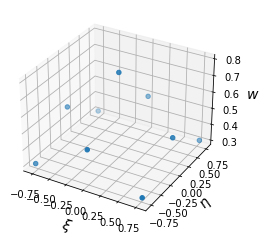

In [21]:
from FEToy.fe.gaussrule import gausspoint2d

my2dgp=gausspoint2d(ngp=3) # generated in the tensor-product way, ngp means the number of gauss point in each direction
my2dgp.creategausspoint() # generate gauss points
my2dgp.print()
my2dgp.plot()

In [32]:
#analyticalsol=4.0/15.0
analyticalsol=0.431111

ngp=5
my2dgp.setnum(ngp) # set up the number of gauss point in each direction
my2dgp.update()
sum=0.0
for i in range(my2dgp.ngp2):
    # ngp2=ngp*ngp
    x,y,w=my2dgp.gpcoords[i,1],my2dgp.gpcoords[i,2],my2dgp.gpcoords[i,0]
    # 0-> weight, 1-> xi, 2-> eta
    #sum+=(x**2)*(y**4)*w
    sum+=np.sin(x*x*y*y)*w

error=100.0*np.abs(sum-analyticalsol)/analyticalsol # in percentage

print('error is %g %%'%(error))
my2dgp.print()

error is 0.00188868 %
1-th gauss point: xi=  -9.06180e-01, eta=  -9.06180e-01, weight=   5.61343e-02
2-th gauss point: xi=  -9.06180e-01, eta=  -5.38469e-01, weight=   1.13400e-01
3-th gauss point: xi=  -9.06180e-01, eta=   0.00000e+00, weight=   1.34785e-01
4-th gauss point: xi=  -9.06180e-01, eta=   5.38469e-01, weight=   1.13400e-01
5-th gauss point: xi=  -9.06180e-01, eta=   9.06180e-01, weight=   5.61343e-02
6-th gauss point: xi=  -5.38469e-01, eta=  -9.06180e-01, weight=   1.13400e-01
7-th gauss point: xi=  -5.38469e-01, eta=  -5.38469e-01, weight=   2.29085e-01
8-th gauss point: xi=  -5.38469e-01, eta=   0.00000e+00, weight=   2.72287e-01
9-th gauss point: xi=  -5.38469e-01, eta=   5.38469e-01, weight=   2.29085e-01
10-th gauss point: xi=  -5.38469e-01, eta=   9.06180e-01, weight=   1.13400e-01
11-th gauss point: xi=   0.00000e+00, eta=  -9.06180e-01, weight=   1.34785e-01
12-th gauss point: xi=   0.00000e+00, eta=  -5.38469e-01, weight=   2.72287e-01
13-th gauss point: xi=   0.

$(x,y)$ -> $\xi,\eta$ ($\in\{-1,1\}$)